In [ ]:
# !curl -O https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80876  100 80876    0     0   138k      0 --:--:-- --:--:-- --:--:--  138k


In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [63]:
df = pd.read_csv('course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [64]:
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [65]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [66]:
cat_col = list(df.dtypes[df.dtypes == 'object'].index)
df[cat_col].head()

,lead_source,industry,employment_status,location
0,paid_ads,NaN,unemployed,south_america
1,social_media,retail,employed,south_america
2,events,healthcare,unemployed,australia
3,paid_ads,retail,NaN,australia
4,referral,education,self_employed,europe


In [67]:
num_col = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']
df[num_col].head()

,number_of_courses_viewed,annual_income,interaction_count,lead_score
0,1,79450.0,4,0.94
1,1,46992.0,1,0.80
2,5,78796.0,3,0.69
3,2,83843.0,1,0.87
4,3,85012.0,3,0.62


In [68]:
df[cat_col] = df[cat_col].fillna('NA')
df[num_col] = df[num_col].fillna(0.0)

In [69]:
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [70]:
X = df[cat_col + num_col]
y = df['converted']

In [71]:
X[:5], y[:5]

(    lead_source    industry employment_status       location  \
 0      paid_ads          NA        unemployed  south_america   
 1  social_media      retail          employed  south_america   
 2        events  healthcare        unemployed      australia   
 3      paid_ads      retail                NA      australia   
 4      referral   education     self_employed         europe   
 
    number_of_courses_viewed  annual_income  interaction_count  lead_score  
 0                         1        79450.0                  4        0.94  
 1                         1        46992.0                  1        0.80  
 2                         5        78796.0                  3        0.69  
 3                         2        83843.0                  1        0.87  
 4                         3        85012.0                  3        0.62  ,
 0    1
 1    0
 2    1
 3    0
 4    1
 Name: converted, dtype: int64)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=1)

In [74]:
X_train.head()

,lead_source,industry,employment_status,location,number_of_courses_viewed,annual_income,interaction_count,lead_score
462,events,manufacturing,unemployed,europe,2,95543.0,3,0.78
135,referral,NA,student,south_america,1,54924.0,6,0.39
117,organic_search,healthcare,unemployed,europe,2,77352.0,2,0.22
1051,paid_ads,other,employed,south_america,2,34600.0,2,0.31
945,paid_ads,education,unemployed,south_america,0,43615.0,2,0.01


In [75]:
y_train.head()

462     0
135     1
117     0
1051    0
945     0
Name: converted, dtype: int64

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['balance']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `lead_score`
- `number_of_courses_viewed`
- `interaction_count`
- `annual_income`


In [76]:
num_col

['number_of_courses_viewed',
 'annual_income',
 'interaction_count',
 'lead_score']

In [77]:
from sklearn.metrics import roc_auc_score

In [78]:
for col in num_col:
    score = roc_auc_score(y_train, X_train[col])

    print(f"{col}: {round(score, 4)}")

number_of_courses_viewed: 0.7636
annual_income: 0.552
interaction_count: 0.7383
lead_score: 0.6145


### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

In [79]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [80]:
dv = DictVectorizer(sparse=False)

In [81]:
train_dicts = X_train.to_dict(orient='records')
train_dicts[0]

{'lead_source': 'events',
 'industry': 'manufacturing',
 'employment_status': 'unemployed',
 'location': 'europe',
 'number_of_courses_viewed': 2,
 'annual_income': 95543.0,
 'interaction_count': 3,
 'lead_score': 0.78}

In [82]:
X_train = dv.fit_transform(train_dicts)
X_train[0]

array([9.5543e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
       7.8000e-01, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       2.0000e+00])

In [83]:
val_dicts = X_val.to_dict(orient='records')
val_dicts[0]

{'lead_source': 'organic_search',
 'industry': 'manufacturing',
 'employment_status': 'NA',
 'location': 'asia',
 'number_of_courses_viewed': 1,
 'annual_income': 0.0,
 'interaction_count': 0,
 'lead_score': 0.73}

In [84]:
X_val = dv.transform(val_dicts)
X_val[0]

array([0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ,
       0.  , 0.  , 0.  , 0.  , 0.73, 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ])

In [85]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [86]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred[:10]

array([0.57539503, 0.47060769, 0.61901236, 0.61438921, 0.61741032,
       0.67496748, 0.84653511, 0.38205016, 0.55735359, 0.91246751])

In [87]:
score = roc_auc_score(y_val, y_pred)
round(score, 3)

0.817

In [88]:
abs(score - 0.72)

0.09713162688141119

In [89]:
abs(score - 0.92)

0.10286837311858887

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.145
* 0.345
* 0.545
* 0.745

In [56]:
from sklearn.metrics import precision_score, recall_score

In [90]:
threshold = np.linspace(0, 1, 101)
threshold

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [92]:
scores = []
for t in threshold:
        actual_pos = (y_val == 1)
        actual_neg = (y_val == 0)
        pred_pos = (y_pred >= t)
        pred_neg = (y_pred < t)
        tp = (actual_pos & pred_pos).sum()
        tn = (actual_neg & pred_neg).sum()
        fn = (actual_pos & pred_neg).sum()
        fp = (actual_neg & pred_pos).sum()

        scores.append((t, tp, fp, fn, tn))

In [93]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

df_score = pd.DataFrame(scores, columns=columns)
df_score.head()

,threshold,tp,fp,fn,tn
0,0.00,171,122,0,0
1,0.01,171,122,0,0
2,0.02,171,122,0,0
3,0.03,171,122,0,0
4,0.04,171,122,0,0


In [94]:
df_score['precision'] = df_score['tp'] / (df_score['tp'] + df_score['fp'])

In [95]:
df_score['recall'] = df_score['tp'] / (df_score['tp'] + df_score['fn'])

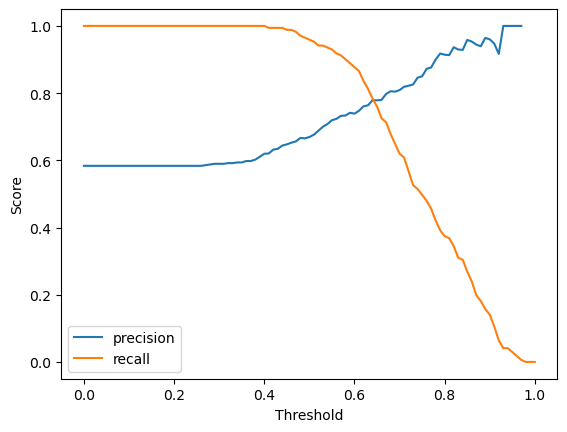

In [98]:
plt.plot(df_score['threshold'], df_score['precision'], label='precision')
plt.plot(df_score['threshold'], df_score['recall'], label='recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()

In [100]:
df_score[df_score['precision'] <= df_score['recall']]

,threshold,tp,fp,fn,tn,precision,recall
0,0.00,171,122,0,0,0.583618,1.000000
1,0.01,171,122,0,0,0.583618,1.000000
2,0.02,171,122,0,0,0.583618,1.000000
3,0.03,171,122,0,0,0.583618,1.000000
4,0.04,171,122,0,0,0.583618,1.000000
...,...,...,...,...,...,...,...
60,0.60,150,53,21,69,0.738916,0.877193
61,0.61,148,50,23,72,0.747475,0.865497
62,0.62,143,45,28,77,0.760638,0.836257
63,0.63,139,43,32,79,0.763736,0.812865


### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.14
- 0.34
- 0.54
- 0.74

In [102]:
df_score['f1'] = 2 * df_score['precision'] * df_score['recall'] / (df_score['precision'] + df_score['recall']) 

In [109]:
df_score.sort_values('f1', ascending=False).head(3)

,threshold,tp,fp,fn,tn,precision,recall,f1
57,0.57,156,57,15,65,0.732394,0.912281,0.812500
55,0.55,159,62,12,60,0.719457,0.929825,0.811224
56,0.56,157,60,14,62,0.723502,0.918129,0.809278


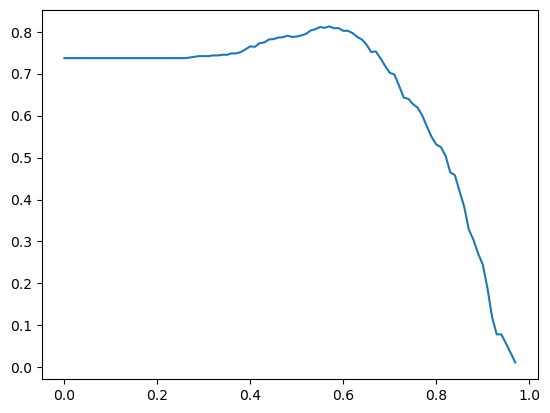

In [105]:
plt.plot(df_score['threshold'], df_score['f1'])

### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.36

In [110]:
from sklearn.model_selection import KFold

In [111]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)


In [112]:
def train(df, y):
    dicts = df.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(dicts)
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)
    return dv, model

In [113]:
def predict(df, dv, model):
    dicts = df.to_dict(orient= 'records')
    X = dv.transform(dicts)
    
    y_pred = model.predict_proba(X)[:,1]
    return y_pred

In [116]:
from tqdm.auto import tqdm

In [118]:
AUC = []

for train_idx, val_idx in tqdm(kfold.split(X_full_train)):
    df_train = X_full_train.iloc[train_idx]
    df_val = X_full_train.iloc[val_idx]
    
    y_train = y_full_train.iloc[train_idx]
    y_val = y_full_train.iloc[val_idx]
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    score = roc_auc_score(y_val, y_pred)
    AUC.append(score)
    
print(f"mean AUC: {round(np.mean(AUC), 3)} +- std: {round(np.std(AUC), 3)}")
    
    

0it [00:00, ?it/s]

mean AUC: 0.822 +- std: 0.036


### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1


In [119]:
def train(df, y, C):
    dicts = df.to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X = dv.fit_transform(dicts)
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)
    return dv, model

In [120]:
for C in [0.000001, 0.001, 1]:
    
    AUC = []
    for train_idx, val_idx in tqdm(kfold.split(X_full_train)):
        df_train = X_full_train.iloc[train_idx]
        df_val = X_full_train.iloc[val_idx]
        
        y_train = y_full_train.iloc[train_idx]
        y_val = y_full_train.iloc[val_idx]
        
        dv, model = train(df_train, y_train, C)
        y_pred = predict(df_val, dv, model)
        
        score = roc_auc_score(y_val, y_pred)
        AUC.append(score)
        
    print(f"C: {C} mean AUC: {round(np.mean(AUC), 3)} +- std: {round(np.std(AUC), 3)}")
    

0it [00:00, ?it/s]

C: 1e-06 mean AUC: 0.56 +- std: 0.024


0it [00:00, ?it/s]

C: 0.001 mean AUC: 0.867 +- std: 0.029


0it [00:00, ?it/s]

C: 1 mean AUC: 0.822 +- std: 0.036
